# Representation

- #### Build BoW Model
To build a Bag-of-Words (BoW) model, need to convert text data into a numerical format using word counts. Below is an process using Scikit-learn's CountVectorizer to implement a BoW model on the meta review dataset.

- Data Extraction: Load the meta review dataset using Hugging Face's datasets library and extract 100 sample reviews.
- CountVectorizer: This converts the reviews into a Bag-of-Words matrix, where each column corresponds to a word, and each row corresponds to a document (review). The entries represent word counts.
- Stopword Removal: Remove common stopwords like "the", "is", etc., using NLTK.
- Bar Plot: Visualize the most frequent words in the reviews using a bar plot.

BoW Representation (First 5 Rows):
   br  color  dry  easy  good  great  hair  like  long  love  make  makeup  \
0   0      0    0     0     0      0     1     1     0     0     0       0   
1   0      0    0     0     0      1     0     0     0     0     0       0   
2   0      0    0     0     0      1     0     2     0     0     0       0   
3   0      0    0     0     0      0     0     0     0     0     0       0   
4   0      0    1     0     0      0     0     0     1     3     1       0   

   nice  one  product  really  skin  use  well  works  
0     0    0        0       0     0    0     0      0  
1     0    0        1       0     0    0     0      0  
2     0    0        0       0     0    0     0      1  
3     1    0        0       0     0    0     0      0  
4     0    0        1       0     1    0     0      0  


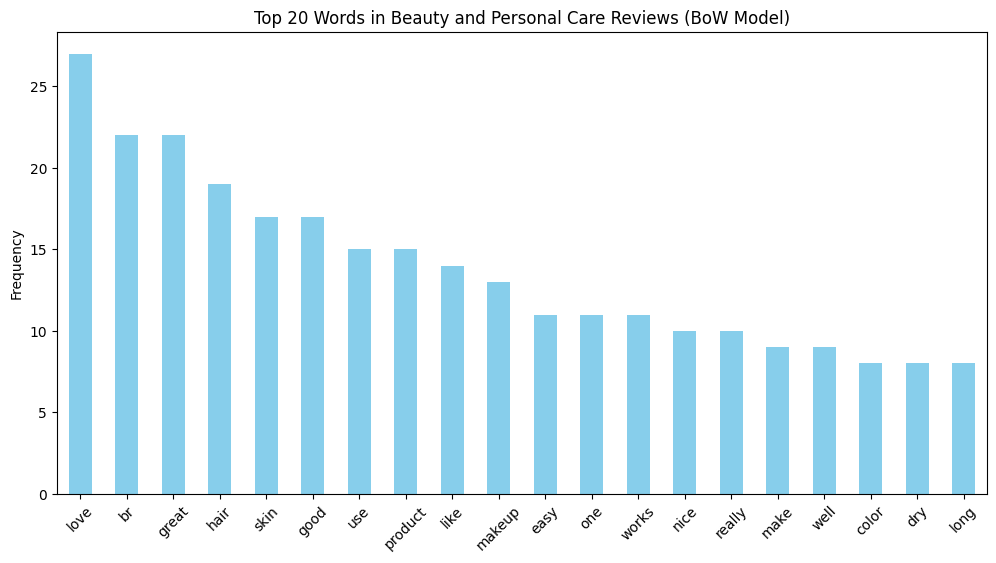

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

# Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Extract a sample of 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Initialize CountVectorizer with stopword removal and fitting it on reviews
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words
bow_matrix = vectorizer.fit_transform(reviews)

# Convert BoW matrix to a DataFrame for easier visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the BoW DataFrame
print("BoW Representation (First 5 Rows):")
print(bow_df.head())

# Sum the word counts for visualization
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

# Plot: Bar plot of the top 20 words in the BoW model
plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in Beauty and Personal Care Reviews (BoW Model)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Word Counts with CountVectorizer (scikit-learn)
- Load meta review Dataset: Load the imdb dataset using Hugging Face's datasets library.
- Select Sample Reviews: Extract the first 100 reviews for a demonstration.
- Initialize CountVectorizer:
    - Stopword Removal: Common stopwords are filtered out using NLTK's stopwords.
    - Limit Features: Set max_features=20 to limit the matrix to the top 20 words by frequency.
- Transform Reviews: fit_transform() creates the Bag-of-Words (BoW) matrix.
- Convert to DataFrame: This allows inspection of the word counts.
- Visualize Word Counts: A bar plot displays the top 20 words by their frequency across reviews.

BoW Representation (First 5 Rows):
   br  color  dry  easy  good  great  hair  like  long  love  make  makeup  \
0   0      0    0     0     0      0     1     1     0     0     0       0   
1   0      0    0     0     0      1     0     0     0     0     0       0   
2   0      0    0     0     0      1     0     2     0     0     0       0   
3   0      0    0     0     0      0     0     0     0     0     0       0   
4   0      0    1     0     0      0     0     0     1     3     1       0   

   nice  one  product  really  skin  use  well  works  
0     0    0        0       0     0    0     0      0  
1     0    0        1       0     0    0     0      0  
2     0    0        0       0     0    0     0      1  
3     1    0        0       0     0    0     0      0  
4     0    0        1       0     1    0     0      0  


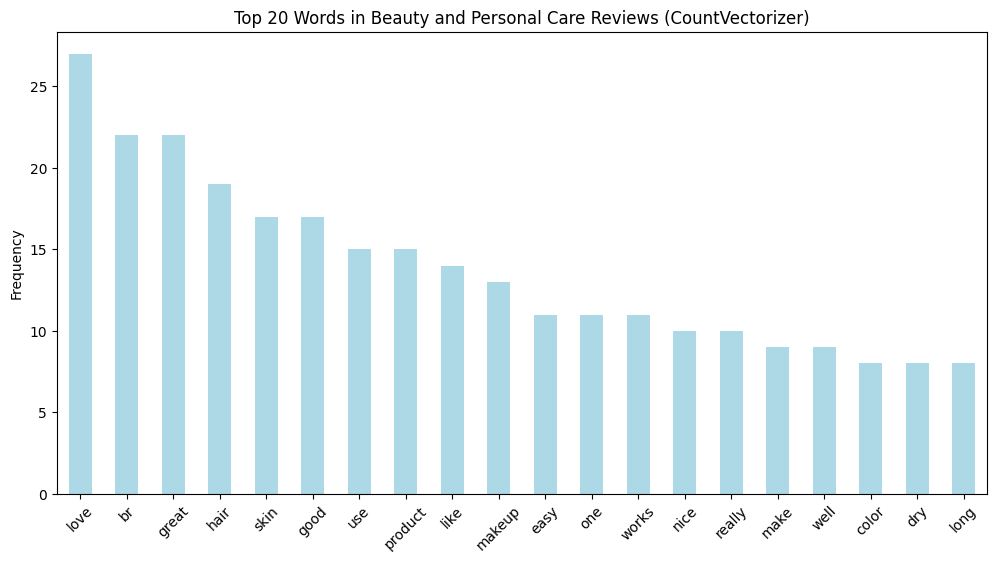

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

# Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 2: Extract the first 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Step 3: Initialize CountVectorizer
stop_words = stopwords.words('english')  # Remove common stopwords
vectorizer = CountVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words

# Step 4: Fit and transform the reviews to create a Bag-of-Words matrix
bow_matrix = vectorizer.fit_transform(reviews)

# Step 5: Convert the BoW matrix to a DataFrame for visualization
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 6: Display the DataFrame with word counts
print("BoW Representation (First 5 Rows):")
print(bow_df.head())

# Step 7: Plot the top 20 words by their frequency
word_counts = bow_df.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
word_counts.plot(kind='bar', color='lightblue')
plt.title('Top 20 Words in Beauty and Personal Care Reviews (CountVectorizer)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Word Frequencies with TfidfVectorizer (scikit-learn)
- Load meta review Dataset: Use Hugging Face’s datasets library to load the IMDb dataset.
- Select Sample Reviews: Extract the first 100 reviews for a quick demonstration.
- Initialize TfidfVectorizer:
    - Stopword Removal: Filters out common stopwords like "the" or "is".
    - Limit Features: Limits the matrix to the top 20 words with the highest TF-IDF scores.
- Transform Reviews: fit_transform() creates the TF-IDF matrix.
- Convert to DataFrame: Makes the matrix easy to read and inspect.
- Summing Scores: Sum the TF-IDF scores for each word across the reviews.
- Plotting: A bar plot displays the top 20 words by their cumulative TF-IDF scores.

TF-IDF Representation (First 5 Rows):
    br  color       dry  easy  good     great      hair      like      long  \
0  0.0    0.0  0.000000   0.0   0.0  0.000000  0.707107  0.707107  0.000000   
1  0.0    0.0  0.000000   0.0   0.0  0.655615  0.000000  0.000000  0.000000   
2  0.0    0.0  0.000000   0.0   0.0  0.343688  0.000000  0.830646  0.000000   
3  0.0    0.0  0.000000   0.0   0.0  0.000000  0.000000  0.000000  0.000000   
4  0.0    0.0  0.338553   0.0   0.0  0.000000  0.000000  0.000000  0.338553   

       love      make  makeup  nice  one   product  really      skin  use  \
0  0.000000  0.000000     0.0   0.0  0.0  0.000000     0.0  0.000000  0.0   
1  0.000000  0.000000     0.0   0.0  0.0  0.755095     0.0  0.000000  0.0   
2  0.000000  0.000000     0.0   0.0  0.0  0.000000     0.0  0.000000  0.0   
3  0.000000  0.000000     0.0   1.0  0.0  0.000000     0.0  0.000000  0.0   
4  0.712298  0.317187     0.0   0.0  0.0  0.278362     0.0  0.292064  0.0   

   well    works  
0   0

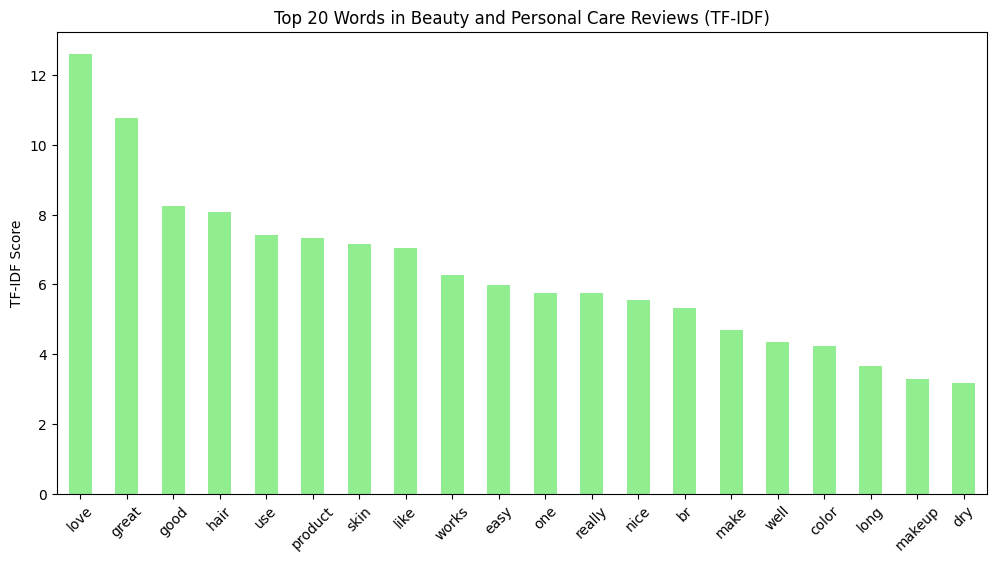

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

# Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 2: Extract the first 100 reviews for demonstration
reviews = [ds[i]['text'] for i in range(100)]

# Step 3: Initialize TfidfVectorizer
stop_words = stopwords.words('english')  # Remove common stopwords
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=20)  # Limit to top 20 words

# Step 4: Fit and transform the reviews to create a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(reviews)

# Step 5: Convert the TF-IDF matrix to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 6: Display the DataFrame with TF-IDF scores
print("TF-IDF Representation (First 5 Rows):")
print(tfidf_df.head())

# Step 7: Sum the TF-IDF scores for each word
word_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

# Step 8: Plot the top 20 words by their TF-IDF scores
plt.figure(figsize=(12, 6))
word_tfidf.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Words in Beauty and Personal Care Reviews (TF-IDF)')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

- ### Training and Testing a Model

- Random Forest Classifier

In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
import pandas as pd

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to a list

# Step 3: # Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 4: Filter and map ratings to binary labels
# Map ratings: 1-2 -> 0 (Negative), 4-5 -> 1 (Positive), exclude 3
df = pd.DataFrame(ds)  # Convert dataset to a pandas DataFrame for easier manipulation
df = df[df['rating'] != 3]  # Exclude neutral ratings
df['label'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)  # Map to binary labels

# Extract text and labels
texts = df['text'].tolist()
labels = df['label'].tolist()

# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 6: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 7: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Step 9: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 90.05%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.57      0.68      3224
    Positive       0.91      0.97      0.94     14498

    accuracy                           0.90     17722
   macro avg       0.87      0.77      0.81     17722
weighted avg       0.90      0.90      0.89     17722



- Logistic Regression Model

In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 4: Prepare the data (train-test split)
# Extract text and labels from the dataset
texts = ds['text']  # Adjust the field name if necessary
labels = ds['rating']  # Use 'rating' as the target column

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X = vectorizer.fit_transform(texts)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 6: Train a Logistic Regression Model
lr_classifier = LogisticRegression(max_iter=100)  # Setting max_iter to 100 for convergence
lr_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = lr_classifier.predict(X_test)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 72.58%

Classification Report:
              precision    recall  f1-score   support

         1.0       0.61      0.66      0.63      2161
         2.0       0.26      0.05      0.08      1025
         3.0       0.37      0.16      0.22      1438
         4.0       0.39      0.12      0.19      2095
         5.0       0.78      0.96      0.86     12411

    accuracy                           0.73     19130
   macro avg       0.48      0.39      0.40     19130
weighted avg       0.66      0.73      0.67     19130



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train an XGBoost Classifier

In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk
import xgboost as xgb

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 4: Prepare the data (train-test split)
# Extract text and labels from the dataset
texts = ds['text']  # Ensure this field exists in your dataset
labels = ds['rating']  # Use 'rating' as the target column

# Optional: Convert ratings into binary classes (e.g., Positive: >=4, Negative: <4)
labels = [1 if rating >= 4 else 0 for rating in labels]  # 1 = Positive, 0 = Negative

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Setting evaluation metric
xgb_classifier.fit(X_train_tfidf, y_train)

# Step 7: Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_tfidf)

# Step 8: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:39:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 85.12%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.51      0.62      4624
    Positive       0.86      0.96      0.91     14506

    accuracy                           0.85     19130
   macro avg       0.83      0.73      0.76     19130
weighted avg       0.85      0.85      0.84     19130



# Compare the Three Models

In [ ]:
# Step 1: Import necessary libraries
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from nltk.corpus import stopwords
import nltk

# Step 2: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))  # Convert stop_words set to list

# Step 3: Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 4: Prepare the data (train-test split)
# Extract text and labels from the dataset
texts = ds['text']  # Ensure 'text' exists in your dataset
ratings = ds['rating']  # Ensure 'rating' exists in your dataset

# Optional: Convert ratings into binary classes (e.g., Positive: >=4, Negative: <4)
labels = [1 if rating >= 4 else 0 for rating in ratings]  # 1 = Positive, 0 = Negative

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 5: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limiting to top 5000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("=" * 50)

# Step 6: Logistic Regression Model
print("Logistic Regression Model Performance:")
lr_classifier = LogisticRegression(max_iter=100)
evaluate_model(lr_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Step 7: Random Forest Classifier
print("Random Forest Classifier Performance:")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Step 8: XGBoost Classifier
print("XGBoost Classifier Performance:")
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Model Performance:
Accuracy: 87.67%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.65      0.72      4624
    Positive       0.89      0.95      0.92     14506

    accuracy                           0.88     19130
   macro avg       0.85      0.80      0.82     19130
weighted avg       0.87      0.88      0.87     19130

Random Forest Classifier Performance:
Accuracy: 85.99%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.57      0.66      4624
    Positive       0.87      0.95      0.91     14506

    accuracy                           0.86     19130
   macro avg       0.83      0.76      0.79     19130
weighted avg       0.85      0.86      0.85     19130

XGBoost Classifier Performance:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:43:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 85.12%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.51      0.62      4624
    Positive       0.86      0.96      0.91     14506

    accuracy                           0.85     19130
   macro avg       0.83      0.73      0.76     19130
weighted avg       0.85      0.85      0.84     19130



Compare the Three Models (Graphics)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


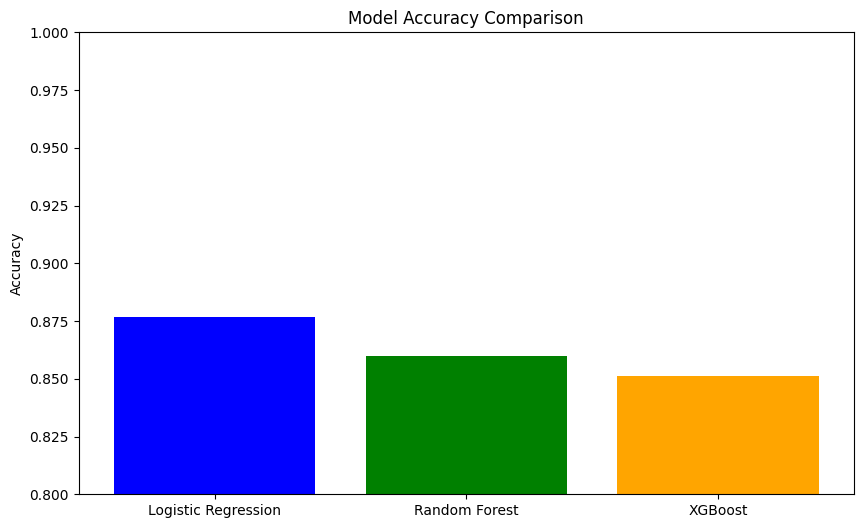

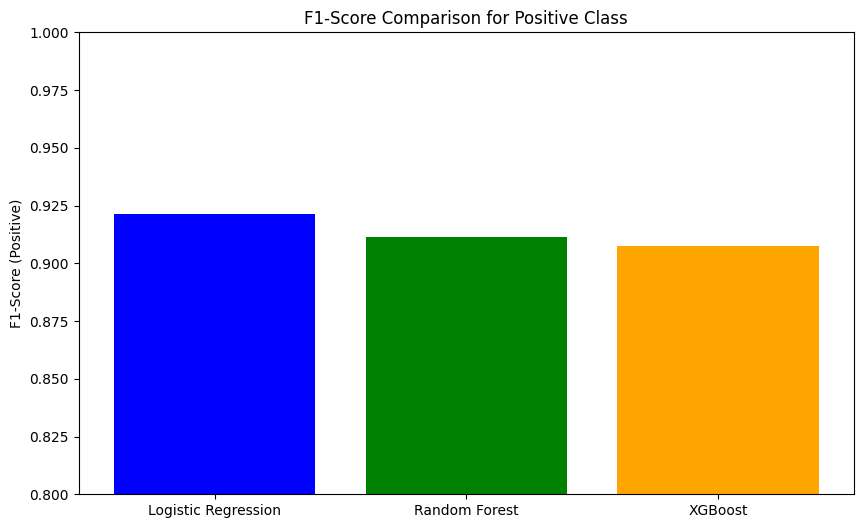

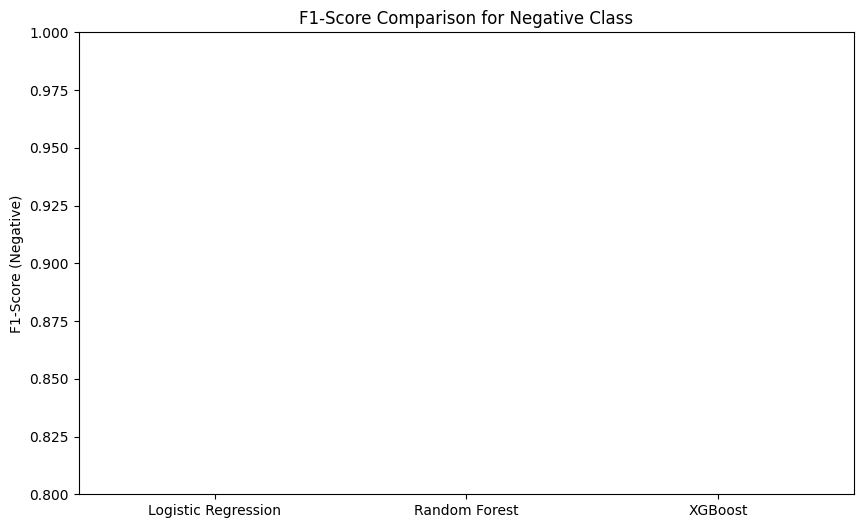

In [ ]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Step 1: Download necessary NLTK resources
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

# Step 2: Load the sampled dataset
ds = load_dataset("json", data_files="sampled_data_0_4_percent.jsonl", split="train")

# Step 3: Prepare the data (train-test split)
texts = ds['text']
ratings = ds['rating']
labels = [1 if rating >= 4 else 0 for rating in ratings]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Step 4: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Define and train models
lr_classifier = LogisticRegression(max_iter=100)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = xgb.XGBClassifier(eval_metric='logloss')

def evaluate_model_graph(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, target_names=['Negative', 'Positive'], zero_division=0)
    f1_positive = report['Positive']['f1-score']
    f1_negative = report['Negative']['f1-score']
    return accuracy, f1_positive, f1_negative

# Evaluate each model
lr_accuracy, lr_f1_pos, lr_f1_neg = evaluate_model_graph(lr_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)
rf_accuracy, rf_f1_pos, rf_f1_neg = evaluate_model_graph(rf_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)
xgb_accuracy, xgb_f1_pos, xgb_f1_neg = evaluate_model_graph(xgb_classifier, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Plot results
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [lr_accuracy, rf_accuracy, xgb_accuracy]
f1_pos_scores = [lr_f1_pos, rf_f1_pos, xgb_f1_pos]
f1_neg_scores = [lr_f1_neg, rf_f1_neg, xgb_f1_neg]

# Plot Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

# Plot F1-Score (Positive)
plt.figure(figsize=(10, 6))
plt.bar(models, f1_pos_scores, color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison for Positive Class')
plt.ylabel('F1-Score (Positive)')
plt.ylim([0.8, 1.0])
plt.show()

# Plot F1-Score (Negative)
plt.figure(figsize=(10, 6))
plt.bar(models, f1_neg_scores, color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison for Negative Class')
plt.ylabel('F1-Score (Negative)')
plt.ylim([0.8, 1.0])
plt.show()

